In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def read_notch_root_evolution_data(file_name):
    data = np.loadtxt(f'{file_name}/export_data/notch_root_evolution_data.txt', skiprows=3)
    columns = ['X', 'Cbar_L', 'Cbar_total', 'Cbar_trap', 'PEEQ', 'PSI_Cbar_L', 
               'S_11', 'S_12', 'S_22', 'S_33', 'S_Mises', 'dPEEQ', 
               'eps_elastic_11', 'eps_elastic_12', 'eps_elastic_22', 'eps_elastic_33', 
               'eps_plastic_11', 'eps_plastic_12', 'eps_plastic_22', 'eps_plastic_33', 
               'eps_total_11', 'eps_total_12', 'eps_total_22', 'eps_total_33', 
               'hydrostatic_stress', 'rho_d', 'theta_L', 'theta_trap']
    df = pd.DataFrame(data, columns=columns)
    return df

def read_notch_root_path_final_frame_data(file_name):
    data = np.loadtxt(f'{file_name}/export_data/notch_root_path_final_frame_data.txt', skiprows=3)
    columns = ['X', 'Cbar_L', 'Cbar_total', 'Cbar_trap', 'PEEQ', 'PSI_Cbar_L', 
               'S_11', 'S_12', 'S_22', 'S_33', 'S_Mises', 'dPEEQ', 
               'eps_elastic_11', 'eps_elastic_12', 'eps_elastic_22', 'eps_elastic_33', 
               'eps_plastic_11', 'eps_plastic_12', 'eps_plastic_22', 'eps_plastic_33', 
               'eps_total_11', 'eps_total_12', 'eps_total_22', 'eps_total_33', 
               'hydrostatic_stress', 'rho_d', 'theta_L', 'theta_trap']
    df = pd.DataFrame(data, columns=columns)
    return df

def read_PSI_Cbar_L_notch_root_path_evolution_data(file_name):
    data = np.loadtxt(f'{file_name}/export_data/PSI_Cbar_L_notch_root_path_evolution_data.txt', skiprows=3) 
    columns = ['X', 'PSI_Cbar_L_0s', 'PSI_Cbar_L_10000s', 'PSI_Cbar_L_20000s', 'PSI_Cbar_L_30000s', 'PSI_Cbar_L_40000s', 'PSI_Cbar_L_50000s', 'PSI_Cbar_L_60000s', 'PSI_Cbar_L_70000s', 'PSI_Cbar_L_80000s', 'PSI_Cbar_L_90000s', 'PSI_Cbar_L_100000s']
    df = pd.DataFrame(data, columns=columns)
    return df

In [4]:
element_types = ['CPE8RT', 'CPE8HT']
PSI_Cbar_L_cases = ['case 1 PSI_Cbar_L 1p0', 'case 2 PSI_Cbar_L 0p2', 'case 3 PSI_Cbar_L decreasing']
PSI_Cbar_L_cases_short = ['case (a)', 'case (b)', 'case (c)']
df_dict = {}
for element in element_types:
    df_dict[element] = {}
    for i, PSI_Cbar_L_case in enumerate(PSI_Cbar_L_cases):
        filename = f"result {element} {PSI_Cbar_L_case}"
        PSI_Cbar_L_case_name = PSI_Cbar_L_cases_short[i]
        df_dict[element][PSI_Cbar_L_case_name] = {}
        df_dict[element][PSI_Cbar_L_case_name]['notch_root_evolution_data'] = read_notch_root_evolution_data(filename)
        df_dict[element][PSI_Cbar_L_case_name]['notch_root_path_final_frame_data'] = read_notch_root_path_final_frame_data(filename)
        df_dict[element][PSI_Cbar_L_case_name]['PSI_Cbar_L_notch_root_path_evolution_data'] = read_PSI_Cbar_L_notch_root_path_evolution_data(filename)

CPE8HT case (a) stress and strain
strain = 0.124456421
stress = 1296816230.0
CPE8HT case (b) stress and strain
strain = 0.131815323
stress = 363568634.0


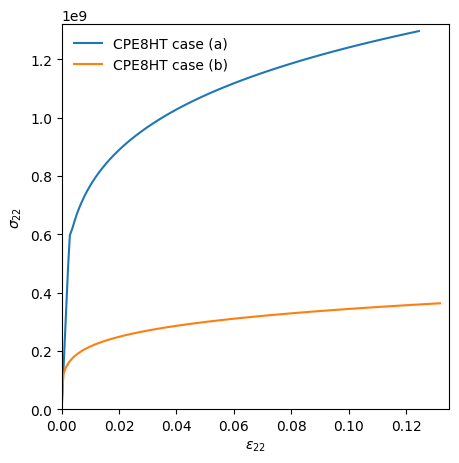

In [5]:
# Plotting case (1) and case (2) stress strain curve in y direction, or S_22 and eps_total_22
# Data is from notch_root_evolution_data
# The figure size is a square

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for element in ['CPE8HT']:
    for PSI_Cbar_L_case in ['case (a)', 'case (b)']:
        df = df_dict[element][PSI_Cbar_L_case]['notch_root_evolution_data']
        # print last values of stress and strain 
        print(f'{element} {PSI_Cbar_L_case} stress and strain')
        
        print(f"strain = {df['eps_total_22'].iloc[-1]}")
        print(f"stress = {df['S_22'].iloc[-1]}")

        ax.plot(df['eps_total_22'], df['S_22'], label=f'{element} {PSI_Cbar_L_case}')
        ax.set_xlabel(r"$\epsilon_{22}$")
        ax.set_ylabel(r"$\sigma_{22}$")
        ax.legend(frameon=False)
        ax.set_xlim(0, 0.135)
        ax.set_ylim(0, 1.32e9)
        

CPE8HT case (c) stress and strain
strain = 0.130742172
stress = 655839355.0


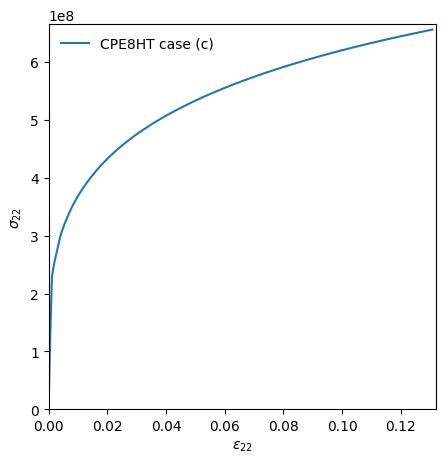

In [14]:
## Do the same but for case (c) alone

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

element = 'CPE8HT'
PSI_Cbar_L_case = 'case (c)'

df = df_dict[element][PSI_Cbar_L_case]['notch_root_evolution_data']
# print last values of stress and strain

print(f'{element} {PSI_Cbar_L_case} stress and strain')
print(f"strain = {df['eps_total_22'].iloc[-1]}")
print(f"stress = {df['S_22'].iloc[-1]}")

ax.plot(df['eps_total_22'], df['S_22'], label=f'{element} {PSI_Cbar_L_case}')
ax.set_xlabel(r"$\epsilon_{22}$")
ax.set_ylabel(r"$\sigma_{22}$")

ax.set_xlim(0, 0.132)
ax.set_ylim(0, 0.665e9)
ax.legend(frameon=False)

plt.show()

CPE8HT case (a) hydrostatic stress
max hydrostatic stress = 1042371870.0
CPE8HT case (b) hydrostatic stress
max hydrostatic stress = 297388031.0
CPE8HT case (c) hydrostatic stress
max hydrostatic stress = 493200104.0


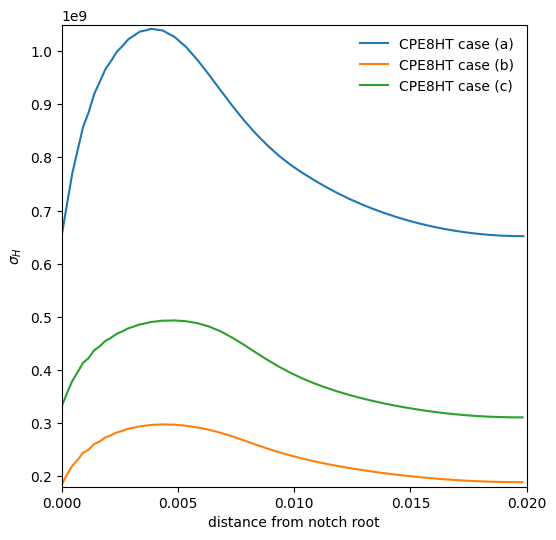

In [7]:
# Plotting case (a), case (b), case(c) hydrostatic stress
# Data is from notch_root_path_final_frame_data
# The figure size is a square

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for element in ['CPE8HT']:
    for PSI_Cbar_L_case in ['case (a)', 'case (b)', 'case (c)']:
        df = df_dict[element][PSI_Cbar_L_case]['notch_root_path_final_frame_data']
        # print max values of hydrostatic stress
        print(f'{element} {PSI_Cbar_L_case} hydrostatic stress')
        print(f"max hydrostatic stress = {df['hydrostatic_stress'].max()}")
        
        ax.plot(df['X'], df['hydrostatic_stress'], label=f'{element} {PSI_Cbar_L_case}')
        ax.set_xlabel(r"distance from notch root")
        ax.set_ylabel(r"$\sigma_{H}$")
        ax.set_xticks([0, 0.005, 0.01, 0.015, 0.02])
        ax.legend(frameon=False)
        ax.set_xlim(0, 0.02)
        ax.set_ylim(0.18e9, 1.05e9)

CPE8HT case (a) Cbar_L
max Cbar_L = 30.0838318
CPE8HT case (b) Cbar_L
max Cbar_L = 27.6949787
CPE8HT case (c) Cbar_L
max Cbar_L = 28.1570892


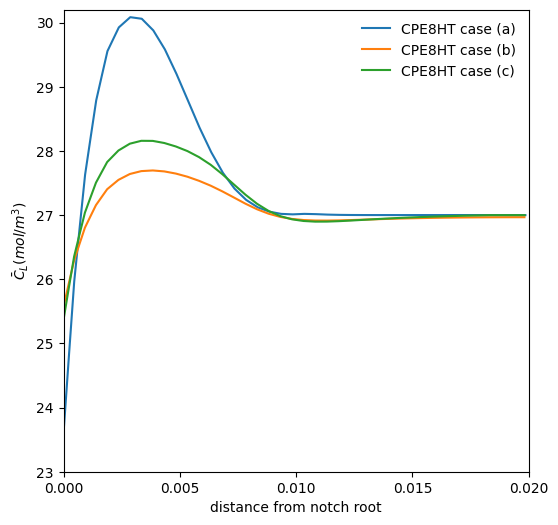

In [8]:
# Do the same like above figure but for Cbar_L

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for element in ['CPE8HT']:
    for PSI_Cbar_L_case in ['case (a)', 'case (b)', 'case (c)']:
        df = df_dict[element][PSI_Cbar_L_case]['notch_root_path_final_frame_data']
        # print max values of Cbar_L
        print(f'{element} {PSI_Cbar_L_case} Cbar_L')
        print(f"max Cbar_L = {df['Cbar_L'].max()}")
        
        ax.plot(df['X'], df['Cbar_L'], label=f'{element} {PSI_Cbar_L_case}')
        ax.set_xlabel(r"distance from notch root")
        ax.set_ylabel(r"$\bar{C}_{L} (mol/m^3)$")
        ax.set_xticks([0, 0.005, 0.01, 0.015, 0.02])
        ax.legend(frameon=False)
        ax.set_xlim(0, 0.02)
        ax.set_ylim(23, 30.2)

CPE8HT case (a) Cbar_trap
max Cbar_trap = 0.889958374
CPE8HT case (b) Cbar_trap
max Cbar_trap = 1.056054
CPE8HT case (c) Cbar_trap
max Cbar_trap = 1.02665162


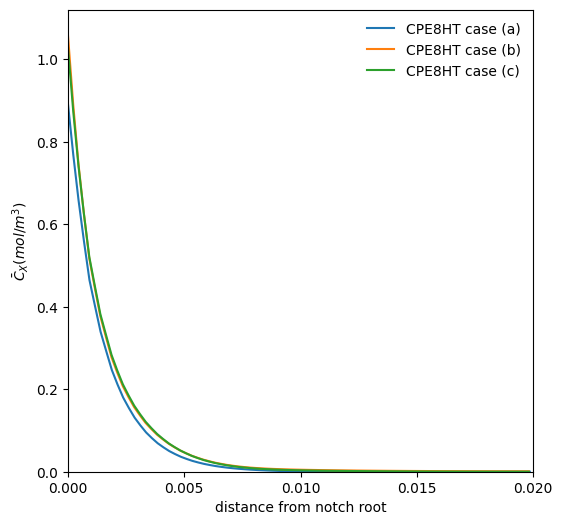

In [9]:
## Do the same like above but for Cbar_trap

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for element in ['CPE8HT']:
    for PSI_Cbar_L_case in ['case (a)', 'case (b)', 'case (c)']:
        df = df_dict[element][PSI_Cbar_L_case]['notch_root_path_final_frame_data']
        # print max values of Cbar_trap
        print(f'{element} {PSI_Cbar_L_case} Cbar_trap')
        print(f"max Cbar_trap = {df['Cbar_trap'].max()}")
        
        ax.plot(df['X'], df['Cbar_trap'], label=f'{element} {PSI_Cbar_L_case}')
        ax.set_xlabel(r"distance from notch root")
        ax.set_ylabel(r"$\bar{C}_{X} (mol/m^3)$")
        ax.set_xticks([0, 0.005, 0.01, 0.015, 0.02])
        ax.legend(frameon=False)
        ax.set_xlim(0, 0.02)
        ax.set_ylim(0, 1.12)

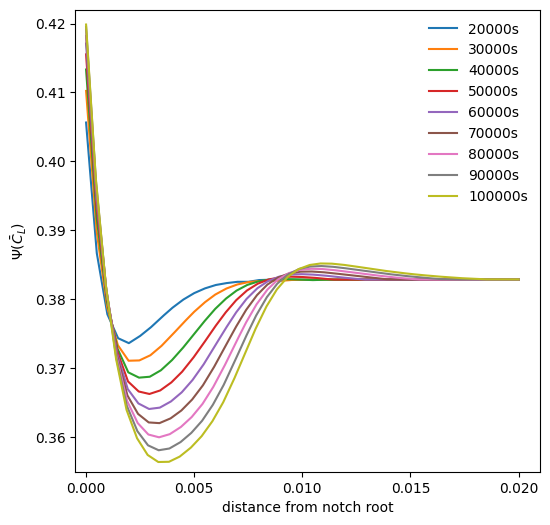

In [27]:
## Finally, we can plot the evolution of PSI_Cbar_L for case (c).
## Only plot 20000s to 100000s

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

element = 'CPE8HT'
PSI_Cbar_L_case = 'case (c)'

df = df_dict[element][PSI_Cbar_L_case]['PSI_Cbar_L_notch_root_path_evolution_data']
# we dont need to print max values

ax.plot(df['X'], df['PSI_Cbar_L_20000s'], label='20000s')
ax.plot(df['X'], df['PSI_Cbar_L_30000s'], label='30000s')
ax.plot(df['X'], df['PSI_Cbar_L_40000s'], label='40000s')
ax.plot(df['X'], df['PSI_Cbar_L_50000s'], label='50000s')
ax.plot(df['X'], df['PSI_Cbar_L_60000s'], label='60000s')
ax.plot(df['X'], df['PSI_Cbar_L_70000s'], label='70000s')
ax.plot(df['X'], df['PSI_Cbar_L_80000s'], label='80000s')
ax.plot(df['X'], df['PSI_Cbar_L_90000s'], label='90000s')
ax.plot(df['X'], df['PSI_Cbar_L_100000s'], label='100000s')

ax.set_xlabel(r"distance from notch root")
ax.set_ylabel(r"$\Psi({\bar{C}_{L}})$")
ax.set_xticks([0, 0.005, 0.01, 0.015, 0.02])
ax.legend(frameon=False)
ax.set_xlim(-0.0005, 0.021)
ax.set_ylim(0.355, 0.422)

plt.show()



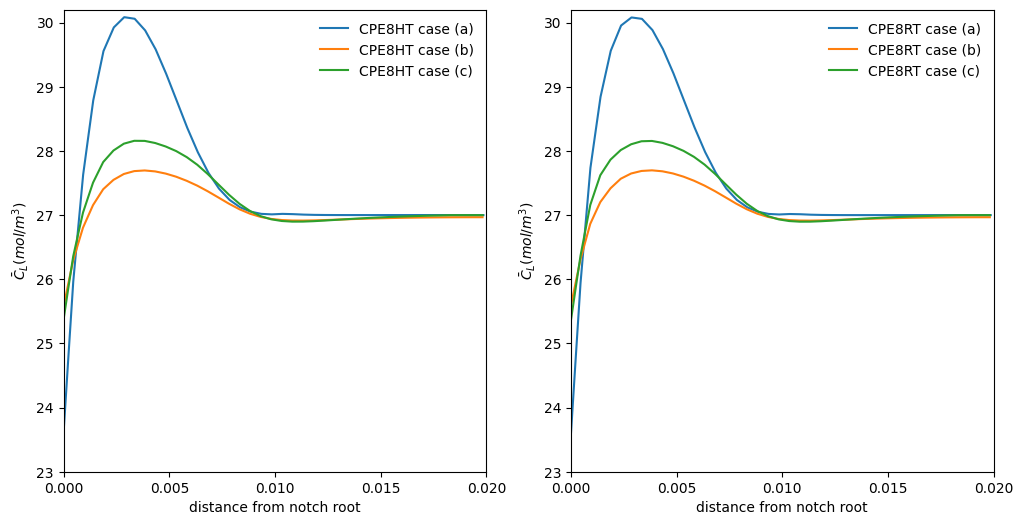

In [32]:
### Now we plot both CPE8HT and CPE8RT for case (a), (b), (c) for Cbar_L on two side by side figures

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, element in enumerate(['CPE8HT', 'CPE8RT']):
    for j, PSI_Cbar_L_case in enumerate(['case (a)', 'case (b)', 'case (c)']):
        df = df_dict[element][PSI_Cbar_L_case]['notch_root_path_final_frame_data']
        ax[i].plot(df['X'], df['Cbar_L'], label=f'{element} {PSI_Cbar_L_case}')
        ax[i].set_xlabel(r"distance from notch root")
        ax[i].set_ylabel(r"$\bar{C}_{L} (mol/m^3)$")
        ax[i].set_xticks([0, 0.005, 0.01, 0.015, 0.02])
        ax[i].legend(frameon=False)
        ax[i].set_xlim(0, 0.02)
        ax[i].set_ylim(23, 30.2)

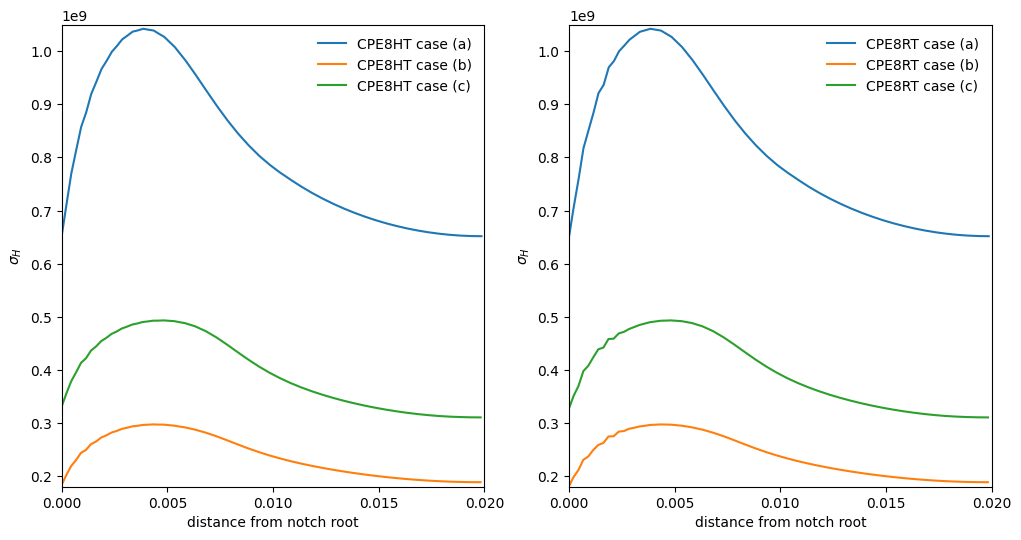

In [33]:
### now do the same but for hydrostatic stress

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, element in enumerate(['CPE8HT', 'CPE8RT']):
    for j, PSI_Cbar_L_case in enumerate(['case (a)', 'case (b)', 'case (c)']):
        df = df_dict[element][PSI_Cbar_L_case]['notch_root_path_final_frame_data']
        ax[i].plot(df['X'], df['hydrostatic_stress'], label=f'{element} {PSI_Cbar_L_case}')
        ax[i].set_xlabel(r"distance from notch root")
        ax[i].set_ylabel(r"$\sigma_{H}$")
        ax[i].set_xticks([0, 0.005, 0.01, 0.015, 0.02])
        ax[i].legend(frameon=False)
        ax[i].set_xlim(0, 0.02)
        ax[i].set_ylim(0.18e9, 1.05e9)

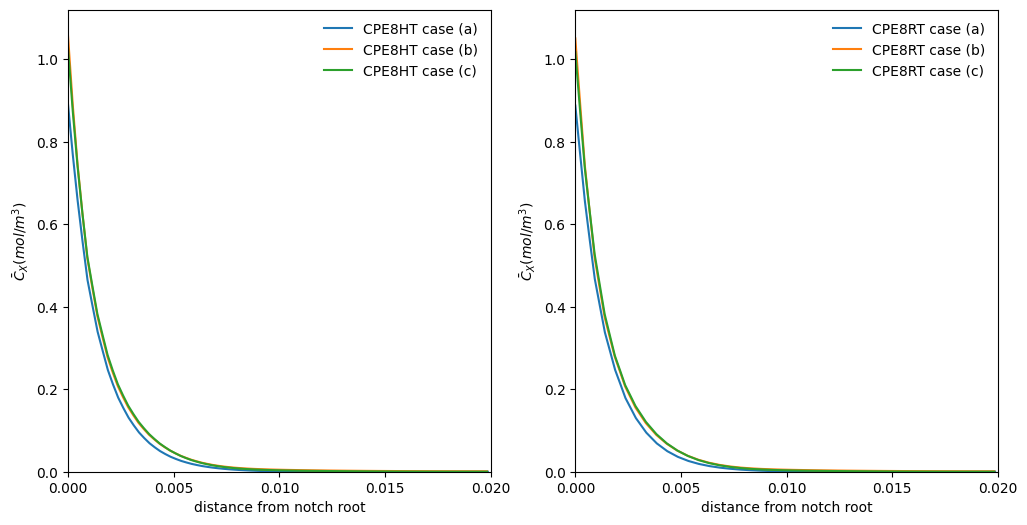

In [34]:
### Now do the same but for trapped hydrogen Cbar_trap

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, element in enumerate(['CPE8HT', 'CPE8RT']):
    for j, PSI_Cbar_L_case in enumerate(['case (a)', 'case (b)', 'case (c)']):
        df = df_dict[element][PSI_Cbar_L_case]['notch_root_path_final_frame_data']
        ax[i].plot(df['X'], df['Cbar_trap'], label=f'{element} {PSI_Cbar_L_case}')
        ax[i].set_xlabel(r"distance from notch root")
        ax[i].set_ylabel(r"$\bar{C}_{X} (mol/m^3)$")
        ax[i].set_xticks([0, 0.005, 0.01, 0.015, 0.02])
        ax[i].legend(frameon=False)
        ax[i].set_xlim(0, 0.02)
        ax[i].set_ylim(0, 1.12)